### Part 1 - Mandatory
Build a second model, `model_2`:
- selecting additional variables
- performing feature engineering (feel free to use features engineered previously)
- performing cross-validation
- dealing with class imbalance
- any additional techniques you would like to add to improve your model, at your discretion

Compare it to `model` by using the evaluation metrics covered in this session.

In [ ]:
# Load the dataset
# Note: optionally, added a 'sample' step to reduce size if facing slowdown/computational challenges.

df = pd.read_csv(rf"{path_python_material}/data/1-raw/lending-club-2007-2020Q3/Loan_status_2007-2020Q3-100ksample.csv")

# Display the first few rows of the dataset

df.head(5)

,Unnamed: 0.1,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,1746494,25450,167338079,4000.0,4000.0,4000.0,36 months,13.08%,134.93,B,B5,cashier,10+ years,MORTGAGE,48000.0,Source Verified,Mar-2020,Current,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,115xx,NY,20.25,1.0,Dec-2004,665.0,669.0,0.0,19.0,110.0,4.0,1.0,1988.0,82.8%,12.0,w,3816.34,3816.34,266.950000,266.95,183.66,83.29,0.0,0.0,0.0,May-2020,134.93,Jun-2020,May-2020,669.0,665.0,1.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,3832.0,259024.0,0.0,1.0,0.0,1.0,16.0,9960.0,56.0,0.0,0.0,0.0,59.0,2400.0,1.0,0.0,0.0,1.0,64756.0,NaN,NaN,0.0,0.0,179.0,75.0,38.0,16.0,2.0,NaN,19.0,16.0,19.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,NaN,1.0,0.0,395328.0,11948.0,0.0,17928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,2370717,81861,71016917,24000.0,24000.0,24000.0,60 months,9.16%,500.07,B,B2,ABM,6 years,RENT,57000.0,Source Verified,Feb-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,708xx,LA,25.33,0.0,Jan-2004,680.0,684.0,0.0,NaN,NaN,10.0,0.0,22697.0,64.5%,24.0,w,4333.29,4333.29,25496.160000,25496.16,19666.71,5829.45,0.0,0.0,0.0,May-2020,500.07,Jun-2020,May-2020,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,61815.0,0.0,3.0,0.0,3.0,14.0,39118.0,72.0,1.0,1.0,2137.0,67.0,35200.0,0.0,7.0,0.0,4.0,6182.0,7741.0,40.5,0.0,0.0,145.0,137.0,7.0,7.0,0.0,7.0,NaN,24.0,NaN,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,0.0,0.0,0.0,1.0,95.8,60.0,0.0,0.0,88154.0,61815.0,13000.0,52954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2264870,397109,39589826,5000.0,5000.0,5000.0,36 months,10.49%,162.49,B,B3,driver,10

#### Selecting additional variables


In [ ]:
# Creating the target variable

df['loan_default'] = df.loan_status == "Charged Off"

In [ ]:
# Due to time restrictions, I've decided to drop any features with more than
# 90% blank values to make the feature list more manageable. In practise I
# would make sure that I was justified in dropping these features and they
# didn't contain important data before dropping them

df2=df.dropna(axis=1,thresh=len(df)*0.90)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 94 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0.1                100000 non-null  int64  
 1   Unnamed: 0                  100000 non-null  int64  
 2   id                          100000 non-null  int64  
 3   loan_amnt                   100000 non-null  float64
 4   funded_amnt                 100000 non-null  float64
 5   funded_amnt_inv             100000 non-null  float64
 6   term                        100000 non-null  object 
 7   int_rate                    100000 non-null  object 
 8   installment                 100000 non-null  float64
 9   grade                       100000 non-null  object 
 10  sub_grade                   100000 non-null  object 
 11  emp_title                   91046 non-null   object 
 12  emp_length                  93050 non-null   object 
 13  home_ownership 

In [ ]:
# As we're building a challenger model to compare against the champion
# model, I'll remove the features that the champion model also
# removed due to the information not being available at the time of
# predictions

df2 = df2.drop(columns = ["out_prncp",
                             "out_prncp_inv",
                             "total_pymnt",
                             "total_pymnt_inv",
                             "funded_amnt",
                             "funded_amnt_inv"]
                            )

# The id column does not provide any relevance to the target variable
# and the unnamed columns are unclear in the data they're providing. In a real
# scenario I would investigate this at the data's source but in this scenario I
# will drop these columns too

df2 = df2.drop(columns = ["id",
                             "Unnamed: 0",
                             "Unnamed: 0.1"]
                            )

print(f"The dataset currently has {len(df2.columns)} columns.")

The dataset currently has 85 columns.


In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Here I'm splitting the dataset in two, to decide which
# numeric features and which non-numeric features
# I'd like to include in model_2

df_numeric = df2.select_dtypes(include=['number'])
df_non_numeric = df2.select_dtypes(exclude=['number'])

##### Numeric variables

In [ ]:
# Starting numeric columns

print(f"The numeric dataset starts with {len(df_numeric.columns)} columns.")

The numeric dataset starts with 60 columns.


In [ ]:
# I'm using a variance detector to remove numeric features that
# have less than 0.5 variance between all their values, as features
# with a higher variance should improve the models predictive performance.
# With more time this could be iterated on to increase/decrease the
# threshold and trial including different features

def variance_threshold_selector(data, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(df_numeric)
    return data[data.columns[selector.get_support(indices=True)]]

df_numeric = variance_threshold_selector(df_numeric, 0.5)

print(f"The numeric dataset post-variance threshold selector has \
{len(df_numeric.columns)} columns we want to use:")
list(df_numeric)

The numeric dataset post-variance threshold selector has 50 columns we want to use:


['loan_amnt',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'open_acc',
 'revol_bal',
 'total_acc',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'last_fico_range_high',
 'last_fico_range_low',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_credit_limit']

##### Non-numeric variables

In [ ]:
# Starting non-numeric features

print(f"The non-numeric dataset starts with {len(df_non_numeric.columns)} columns:")
list(df_non_numeric)

The non-numeric dataset starts with 25 columns:


['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type',
 'hardship_flag',
 'debt_settlement_flag',
 'loan_default']

In [ ]:
# Examining a sample of values to decide which are important and how
# we could handle them in the models

df_non_numeric.head(10)

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,hardship_flag,debt_settlement_flag,loan_default
0,36 months,13.08%,B,B5,cashier,10+ years,MORTGAGE,Source Verified,Mar-2020,Current,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,115xx,NY,Dec-2004,82.8%,w,May-2020,May-2020,Individual,N,N,False
1,60 months,9.16%,B,B2,ABM,6 years,RENT,Source Verified,Feb-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,708xx,LA,Jan-2004,64.5%,w,May-2020,May-2020,Individual,N,N,False
2,36 months,10.49%,B,B3,driver,10+ years,MORTGAGE,Not Verified,Jan-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,347xx,FL,Apr-2010,52.6%,f,Jan-2018,May-2020,Individual,N,N,False
3,60 months,11.05%,B,B4,NaN,NaN,MORTGAGE,Not Verified,Jun-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,443xx,OH,Oct-2005,12.1%,w,May-2020,May-2020,Individual,N,N,False
4,60 months,13.59%,C,C2,Shipping Clerk,10+ years,MORTGAGE,Source Verified,Jan-2018,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,681xx,NE,Apr-2008,27.1%,w,Jul-2019,Feb-2020,Individual,N,N,False
5,36 months,11.49%,B,B5,CSR,10+ years,RENT,Verified,Nov-2015,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,moving,Moving and relocation,940xx,CA,Jul-2004,38.7%,w,Apr-2018,Oct-2018,Individual,N,N,True
6,36 months,13.98%,C,C1,CDC lll,6 years,MORTGAGE,Not Verified,Jan-2014,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,142xx,NY,May-2001,22%,f,Jul-2015,May-2019,Individual,N,N,False
7,36 months,17.27%,D,D2,Snr Scientist,2 years,RENT,Not Verified,Mar-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,761xx,TX,Jun-1995,82.5%,w,Oct-2018,Dec-2018,Individual,N,N,False
8,36 months,11.71%,B,B3,NaN,NaN,MORTGAGE,Verified,Mar-2020,Issued,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,335xx,FL,Jan-2001,12.1%,w,May-2020,May-2020,Individual,Y,N,False
9,60 months,8.19%,A,A4,Pharmacist,4 years,RENT,Not Verified,May-2019,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,109xx,NY,Mar-2007,16.4%,w,May-2020,May-2020,Individual,N,N,False


In [ ]:
# After using the data dictionary and examining some of the sample values above,
# I've isolated the features I'd like to include at this stage
# This included dropping features that could have lead to data leakage such as
# last_pymnt_d and loan_status

n_n_features = ['term','int_rate', 'grade', 'home_ownership', 'issue_d',
                'loan_default']
df_non_numeric = df_non_numeric[n_n_features]

df_non_numeric.head(10)

,term,int_rate,grade,home_ownership,issue_d,loan_default
0,36 months,13.08%,B,MORTGAGE,Mar-2020,False
1,60 months,9.16%,B,RENT,Feb-2016,False
2,36 months,10.49%,B,MORTGAGE,Jan-2015,False
3,60 months,11.05%,B,MORTGAGE,Jun-2018,False
4,60 months,13.59%,C,MORTGAGE,Jan-2018,False
5,36 months,11.49%,B,RENT,Nov-2015,True
6,36 months,13.98%,C,MORTGAGE,Jan-2014,False
7,36 months,17.27%,D,RENT,Mar-2016,False
8,36 months,11.71%,B,MORTGAGE,Mar-2020,False
9,60 months,8.19%,A,RENT,May-2019,False


In [ ]:
# Time to filter our original dateframe with our newly selected features

features = ['loan_amnt','installment','annual_inc','dti','delinq_2yrs',
 'fico_range_low','fico_range_high','inq_last_6mths','open_acc',
 'revol_bal','total_acc','total_rec_prncp','total_rec_int','total_rec_late_fee',
 'recoveries','collection_recovery_fee','last_pymnt_amnt','last_fico_range_high',
 'last_fico_range_low','tot_coll_amt','tot_cur_bal','total_rev_hi_lim',
 'acc_open_past_24mths','avg_cur_bal','bc_open_to_buy','bc_util','delinq_amnt',
 'mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','num_accts_ever_120_pd',
 'num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl',
 'num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats',
 'num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75','tot_hi_cred_lim',
 'total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit',
 'term','int_rate', 'grade', 'home_ownership', 'issue_d','loan_default']

df2 = df2[features]

df2.head(10)

,loan_amnt,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,revol_bal,total_acc,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,term,int_rate,grade,home_ownership,issue_d,loan_default
0,4000.0,134.93,48000.0,20.25,1.0,665.0,669.0,0.0,4.0,1988.0,12.0,183.66,83.29,0.00,0.00,0.000,134.93,669.0,665.0,3832.0,259024.0,2400.0,1.0,64756.0,NaN,NaN,0.0,179.0,75.0,38.0,16.0,2.0,NaN,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,75.0,NaN,395328.0,11948.0,0.0,17928.0,36 months,13.08%,B,MORTGAGE,Mar-2020,False
1,24000.0,500.07,57000.0,25.33,0.0,680.0,684.0,0.0,10.0,22697.0,24.0,19666.71,5829.45,0.00,0.00,0.000,500.07,704.0,700.0,0.0,61815.0,35200.0,4.0,6182.0,7741.0,40.5,0.0,145.0,137.0,7.0,7.0,0.0,7.0,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,1.0,95.8,60.0,88154.0,61815.0,13000.0,52954.0,60 months,9.16%,B,RENT,Feb-2016,False
2,5000.0,162.49,55000.0,7.22,0.0,665.0,669.0,0.0,7.0,6001.0,9.0,5000.00,846.67,0.00,0.00,0.000,162.43,789.0,785.0,0.0,159131.0,11400.0,4.0,22733.0,4521.0,54.8,0.0,57.0,57.0,14.0,9.0,1.0,14.0,0.0,3.0,5.0,3.0,3.0,2.0,5.0,6.0,5.0,7.0,1.0,100.0,33.3,171118.0,13124.0,10000.0,7526.0,36 months,10.49%,B,MORTGAGE,Jan-2015,False
3,24000.0,522.42,43500.0,24.55,0.0,750.0,754.0,0.0,15.0,6573.0,23.0,7682.31,4318.62,0.00,0.00,0.000,522.42,749.0,745.0,0.0,104590.0,54500.0,4.0,6973.0,43140.0,12.0,0.0,37.0,132.0,1.0,1.0,2.0,1.0,1.0,6.0,7.0,11.0,16.0,2.0,13.0,19.0,7.0,15.0,2.0,95.7,0.0,202606.0,18520.0,49000.0,20000.0,60 months,11.05%,B,MORTGAGE,Jun-2018,False
4,14000.0,322.79,48000.0,24.30,0.0,735.0,739.0,1.0,16.0,11894.0,23.0,14000.00,2605.68,0.00,0.00,0.000,11128.82,779.0,775.0,0.0,90253.0,43900.0,5.0,5641.0,17318.0,39.9,0.0,72.0,117.0,6.0,6.0,2.0,6.0,0.0,4.0,5.0,5.0,6.0,5.0,13.0,16.0,5.0,16.0,4.0,100.0,0.0,152081.0,34847.0,28800.0,38181.0,60 months,13.59%,C,MORTGAGE,Jan-2018,False
5,4000.0,131.89,46000.0,11.56,0.0,700.0,704.0,0.0,4.0,3556.0,7.0,3111.33,694.33,0.00,124.65,22.437,131.89,504.0,500.0,0.0,16847.0,9200.0,1.0,4212.0,4381.0,43.1,0.0,136.0,125.0,13.0,13.0,0.0,13.0,0.0,2.0,3.0,2.0,4.0,2.0,3.0,5.0,3.0,4.0,0.0,100.0,0.0,28077.0,16847.0,7700.0,18877.0,36 months,11.49%,B,RENT,Nov-2015,True
6,7200.0,246.01,33000.0,10.58,0.0,680.0,684.0,1.0,14.0,3466.0,35.0,7200.00,1226.78,0.00,0.00,0.000,4245.06,724.0,720.0,0.0,70443.0,16050.0,10.0,5418.0,1625.0,40.0,0.0,152.0,145.0,3.0,3.0,1.0,3.0,0.0,4.0,12.0,7.0,16.0,2.0,12.0,32.0,6.0,13.0,5.0,69.0,0.0,84782.0,3466.0,6500.0,0.0,36 months,13.98%,C,MORTGAGE,Jan-2014,False
7,19500.0,697.86,99000.0,16.12,0.0,665.0,669.0,1.0,6.0,3959.0,19.0,19500.00,5517.01,34.89,0.00,0.000,4755.10,709.0,705.0,0.0,72077.0,4800.0,4.0,12013.0,841.0,82.5,0.0,115.0,249.0,30.0,5.0,2.0,30.0,0.0,2.0,2.0,2.0,4.0,11.0,2.0,6.0,2.0,6.0,2.0,84.2,100.0,77361.0,72077.0,4800.0,72561.0,36 months,17.27%,D,RENT,Mar-2016,False
8,8925.0,295.21,30026.0,14.03,0.0,790.0,794.0,0.0,7.0,2860.0,21.0,0.00,0.00,0.00,0.00,0.000,0.00,774.0,770.0,0.0,152007.0,23700.0,6.0,21715.0,18640.0,13.3,0.0,125.0,230.0,12.0,12.0,1.0,14.0,0.0,2.0,2.0,4.0,6.0,4.0,5.0,16.0,2.0,7.0,2.0,100.0,0.0,184776.0,8210.0,21500.0,8000.0,36 months,11.71%,B,MORTGAGE,Mar-2020,False
9,38275.0,779.57,129514.0,27.80,0.0,760.0,764.0,1.0,26.0,13107.0,45.0,6459.00,2878.42,0.00,0.00,0.000,779.57,664.0,660.0,0.0,248127.0,79700.0,5.0,9543.0,64264.0,11.2,0.0,115.0,146.0,4.0,4.0,0.0,4.0,0.0,2.0,4.0,7.0,9.0,31.0,9.0,14.0,4.0,26.0,4.0,100.0,0.0,326293.0,248127.0,72400.0,246593.0,60

##### Handling nulls

In [ ]:
#First check for missing values

print("There are", df2.isnull().sum().sum(), "null values across the following \
features:")
print(df2.isnull().sum())

There are 74419 null values across the following features:
loan_amnt                        0
installment                      0
annual_inc                       0
dti                            102
delinq_2yrs                      0
fico_range_low                   0
fico_range_high                  0
inq_last_6mths                   0
open_acc                         0
revol_bal                        0
total_acc                        0
total_rec_prncp                  0
total_rec_int                    0
total_rec_late_fee               0
recoveries                       0
collection_recovery_fee          0
last_pymnt_amnt                  0
last_fico_range_high             0
last_fico_range_low              0
tot_coll_amt                  2438
tot_cur_bal                   2438
total_rev_hi_lim              2438
acc_open_past_24mths          1778
avg_cur_bal                   2440
bc_open_to_buy                2848
bc_util                       2899
delinq_amnt                    

In [ ]:
# Isolating and inspecting the remaining missing values

df_null =df2[df2.isna().any(axis=1)]
df_null = df_null.filter(['dti','tot_coll_amt','tot_cur_bal','total_rev_hi_lim',
 'acc_open_past_24mths','avg_cur_bal','bc_open_to_buy','bc_util',
 'mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','num_accts_ever_120_pd',
 'num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl',
 'num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats',
 'num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75','tot_hi_cred_lim',
 'total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit'], axis=1)

df_null.head(5)

,dti,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,20.25,3832.0,259024.0,2400.0,1.0,64756.0,NaN,NaN,179.0,75.0,38.0,16.0,2.0,NaN,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,75.0,NaN,395328.0,11948.0,0.0,17928.0
13,18.15,0.0,79072.0,0.0,3.0,19768.0,NaN,NaN,142.0,222.0,37.0,16.0,2.0,57.0,0.0,0.0,0.0,1.0,11.0,19.0,1.0,20.0,0.0,4.0,0.0,75.6,NaN,90682.0,79072.0,0.0,90682.0
29,11.05,0.0,7878.0,11300.0,0.0,1970.0,636.0,90.6,NaN,250.0,32.0,32.0,0.0,32.0,0.0,3.0,4.0,3.0,4.0,0.0,4.0,6.0,4.0,4.0,0.0,100.0,100.0,11300.0,7878.0,6800.0,0.0
36,6.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,17.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# After consulting the data dictionary, the below columns are filled with
# 0's as I believe the missing values represent amounts or events where
# no data means 0. In a real scenario I would check this with the data
# owners to make sure this was the case

fill_zero_cols = [
 'dti','tot_coll_amt','tot_cur_bal', 'acc_open_past_24mths',
 'num_accts_ever_120_pd', 'num_actv_bc_tl','num_actv_rev_tl','num_bc_sats',
 'num_bc_tl','num_il_tl', 'num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0',
 'num_sats', 'num_tl_op_past_12m'
 ]

df2[fill_zero_cols] = df2[fill_zero_cols].fillna(0)

In [ ]:
# For the below features, I've chosen to impute the missing values with the
# mean as they're not event or customer-specific. I also know they're numeric
# features so using the mean is feasible as well as appropriate

fill_median_cols = [
 'bc_util','avg_cur_bal','bc_open_to_buy','mort_acc','pct_tl_nvr_dlq',
 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
 'total_il_high_credit_limit', 'mo_sin_old_il_acct','mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl','mths_since_recent_bc',
 'total_rev_hi_lim'
]

df2[fill_median_cols] = df2[fill_median_cols].apply(lambda x: x.fillna(x.median()))

In [ ]:
#Second check for missing values
print("There are", df2.isnull().sum().sum(), "remaining null values")

There are 0 remaining null values


##### Infinite value check

In [ ]:
# Creating a function to check for infinity values
def check_infinity(df):
    infinite_list = df.isin([-np.inf, np.inf]).sum()

    if infinite_list.sum() == 0:
        print("No column has infinite values")
    else:
        print("Columns with infinite values:")
        print(infinite_list[infinite_list>0])

check_infinity(df2)

No column has infinite values


#### Performing feature engineering (feel free to use features engineered previously)


In [ ]:
# Creating the new features based on assignment 1

# Features #1 are based around the issued date and time.
# These should improve the model learning from specific time periods
# and demonstrate which are more useful than others

df2['issued_dt'] = pd.to_datetime(df2['issue_d'], format='%b-%Y')
df2['issued_month'] = df2['issued_dt'].apply(lambda t: t.month)
df2['issued_year'] = df2['issued_dt'].apply(lambda t: t.year)

# Feature #2 is creating bands to bin the different income levels
# together. This allows me to transform a numeric feature into a categorical one
# and enable the model to learn from the fewer band values than the vast
# income values

def income_bands(num):
    if num <= 47500:
        num = "Band 1"
    elif num > 47500 and num <= 55000:
        num = "Band 2"
    elif num > 55000 and num <= 65000:
        num = "Band 3"
    elif num > 65000 and num <= 75000:
        num = "Band 4"
    elif num > 75000 and num <= 85000:
        num = "Band 5"
    elif num > 85000 and num <= 95000:
        num = "Band 6"
    elif num > 95000:
        num = "Band 7"
    return num

df2['income_bands'] = df2['annual_inc'].apply(income_bands)

# Drop the now-redundant columns to reduce dimensionality

df2 = df2.drop(columns = ["issue_d",
                             "issued_dt",
                             "annual_inc"]
                            )

In [ ]:
# Converting the non-numeric columns appropriately by changing the term and
# int_rate to numeric

df2['term'] = df2['term'].str.replace(' months', '').astype(int)
df2['int_rate'] = df2['int_rate'].str.replace('%', '').astype(float)

#### Model development

In [ ]:
# Next I apply one hot encoding the feature that has values with no relation to
# each other, which will alow the text values to be processed by an ML model in
# a numerical format. In this scenario, I only have 1 column that I'd like to
# one hot encode.

df2 = pd.get_dummies(df2, columns=['home_ownership'], dtype=int)

In [ ]:
# Then I label encode the ordinal features I've chosen which are
# grade and income bands. They have an order as the values signify a heirarchy
# to each other, e.g. the higher the income band, in theory the more likely
# they should be not to default compared to someone in the lower band (if both
# were paying back the same amount of money)

from sklearn import preprocessing

le_bands= preprocessing.LabelEncoder()
le_grade = preprocessing.LabelEncoder()

df2['income_bands'] = le_bands.fit_transform(list(df2['income_bands']))
df2['grade'] = le_grade.fit_transform(list(df2['grade']))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Splitting the data into features and target variable

X = df2.drop('loan_default', axis=1)
y = df2['loan_default']

# Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

-------------------------------------------------------------
Metrics
The Random Forest Classifier Model has an accuracy of 98.4%

Log loss = 0.06277965288958667
Mean square error = 0.016
Root mean square error = 0.12649110640673517
Precision = 97.67156862745098%
Recall = 88.75278396436525%
F1 score = 92.99883313885647%
-------------------------------------------------------------
Actual v Predicted
           Result  Actual  Predicted  Count
0   True Negative   False          0  26332
1  False Positive   False          1     76
2  False Negative    True          0    404
3   True Positive    True          1   3188
-------------------------------------------------------------
Heatmap



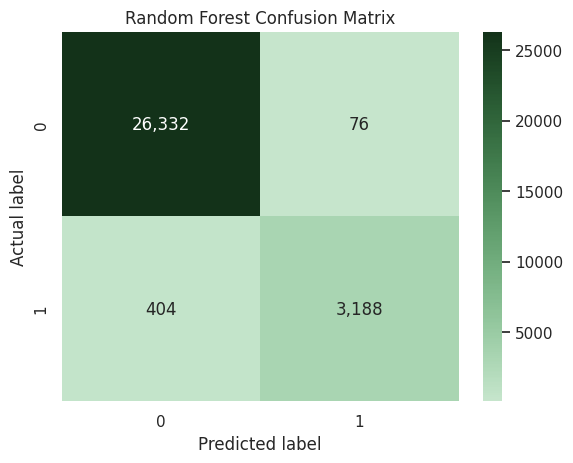

In [ ]:
import sklearn.metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, f1_score, \
precision_score, recall_score, classification_report, confusion_matrix

# Setting up the Random Forest Classifier model. I decided to use a Random Forest
# as they're computationally efficient (as each tree is built independently of
# the other) and they're robust to both overfitting and noise in the data

RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
y_pred_RFC = RFC.predict(X_test)

# Calculating the performance metrics

y_prob_RFC = RFC.predict_proba(X_test)

RFC_acc = sklearn.metrics.accuracy_score(y_test, y_pred_RFC) * 100
RFC_logloss = sklearn.metrics.log_loss(y_test, y_prob_RFC)
RFC_MSE = sklearn.metrics.mean_squared_error(y_test, y_pred_RFC)
RFC_RMSE = np.sqrt(RFC_MSE)
RFC_precision = precision_score(y_test, y_pred_RFC) * 100
RFC_recall = recall_score(y_test, y_pred_RFC) * 100
RFC_f1 = f1_score(y_test, y_pred_RFC) * 100

# Setting up the Random Forest Dataframe

df_RFC = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_RFC})
df_RFC['Predicted'] = df_RFC['Predicted'].astype(int)
RFC_results=["True Negative","False Positive","False Negative","True Positive"]

df_RFC=df_RFC.groupby(["Actual", "Predicted"]).size().reset_index(name="Count")
df_RFC['Result'] = RFC_results
df_RFC = df_RFC[["Result","Actual","Predicted","Count"]]

# Setting up the confusion matrix

cf_matrix_RFC = confusion_matrix(y_test, y_pred_RFC.round())
cmap_RFC = sns.color_palette("ch:start=2,rot=-0", as_cmap=True)

# Displaying the final results

print("-------------------------------------------------------------")
print("\033[4mMetrics\033[0m")
print("The Random Forest Classifier Model has an accuracy of {}%".
      format(RFC_acc))
print("")
print("Log loss = {}".format(RFC_logloss))
print("Mean square error = {}".format(RFC_MSE))
print("Root mean square error = {}".format(RFC_RMSE))
print("Precision = {}%".format(RFC_precision))
print("Recall = {}%".format(RFC_recall))
print("F1 score = {}%".format(RFC_f1))
print("-------------------------------------------------------------")
print("\033[4mActual v Predicted\033[0m")
print(df_RFC)
print("-------------------------------------------------------------")
print("\033[4mHeatmap\033[0m")
print("")
sns.heatmap(cf_matrix_RFC, annot=True,
            fmt='0,', cmap=cmap_RFC)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('Actual label');

#### Performing cross-validation


In [ ]:
from sklearn.model_selection import cross_val_score

# Here I'm performing a 5-fold cross-validation on the data using the Random
# Forest model. Performing cross-validation on a Random Forest isn't the most
# effective as due to the nature of Random Forest, each tree is constructed
# using a new bootstrap of data each time already. However it's still useful to
# see the results to sense check its performance

cv_scores = cross_val_score(RFC, X, y, cv=5, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean CV Accuracy: {cv_scores.mean()}')

Cross-Validation Accuracy Scores: [0.98405 0.98235 0.98275 0.982   0.98425]
Mean CV Accuracy: 0.98308


#### Dealing with class imbalance


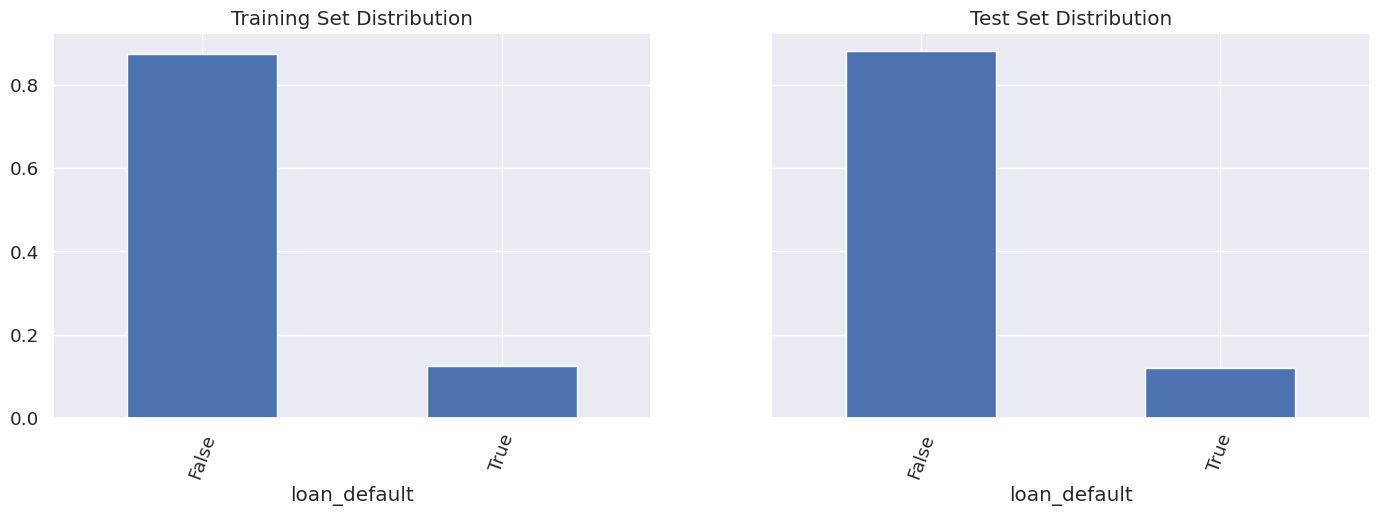

In [ ]:
# First we check to confirm there's a class imbalance in the target variable

def binary_balance(target_train, target_test, plot_dist=True):
    if plot_dist:
        fig, axs = plt.subplots(ncols=2, figsize=(17, 5), sharey=True)

        target_train.value_counts(normalize = True).plot(kind="bar", ax=axs[0])
        axs[0].set_title("Training Set Distribution")
        axs[0].set_xticklabels(target_train.unique(),rotation=70)

        target_test.value_counts(normalize=True).plot(kind="bar", ax=axs[1])
        axs[1].set_title("Test Set Distribution")
        axs[1].set_xticklabels(target_test.unique(), rotation=70)
        plt.show()
    else:
      pass

sns.set(font_scale=1.2)

binary_balance(y_train, y_test, plot_dist=True)

In [ ]:
# We can see there is an imbalance, so to try and improve the model's
# performance I'm going to generate some synthetic records using SMOTE,
# which will help simulate more 'TRUE' scenarios and assist the model in
# learning from more 'TRUE' records. Importantly I'm only doing this in
# the training dataset as we want the test set to remain true to real world
# conditions

oversample = SMOTE()
X_train_O, y_train_O = oversample.fit_resample(X_train, y_train)

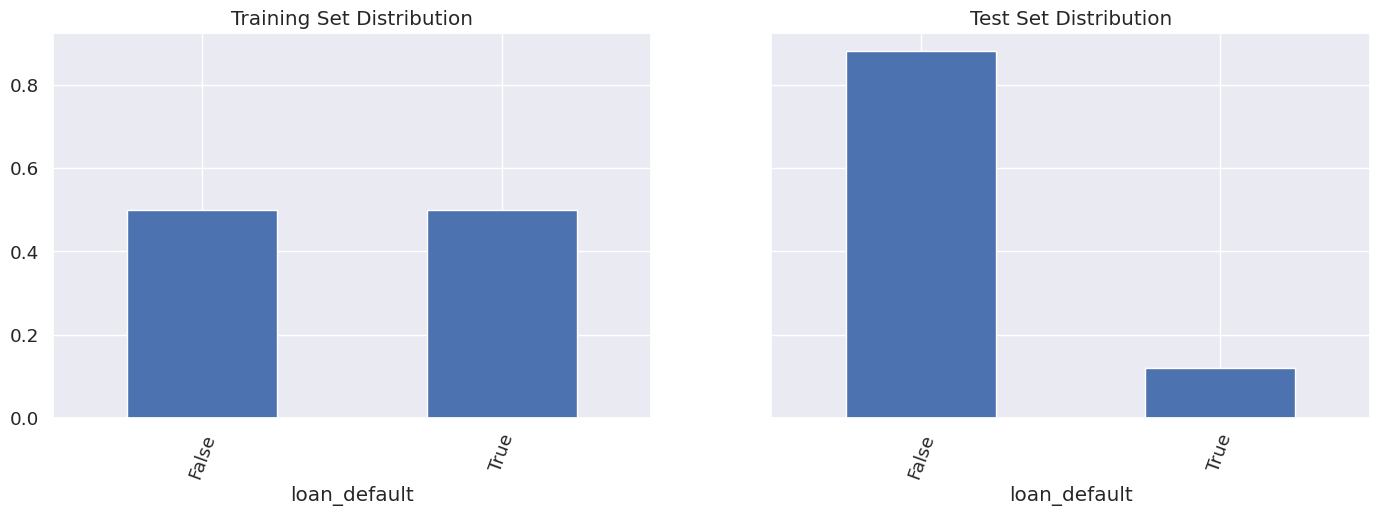

In [ ]:
#Check the new distributions

def binary_balance(target_train, target_test, plot_dist=True):
    if plot_dist:
        fig, axs = plt.subplots(ncols=2, figsize=(17, 5), sharey=True)

        target_train.value_counts(normalize = True).plot(kind="bar", ax=axs[0])
        axs[0].set_title("Training Set Distribution")
        axs[0].set_xticklabels(target_train.unique(),rotation=70)

        target_test.value_counts(normalize=True).plot(kind="bar", ax=axs[1])
        axs[1].set_title("Test Set Distribution")
        axs[1].set_xticklabels(target_test.unique(), rotation=70)
        plt.show()
    else:
      pass

sns.set(font_scale=1.2)

binary_balance(y_train_O, y_test, plot_dist=True)

-------------------------------------------------------------
Metrics
The Random Forest Classifier Model (Oversampled) has an accuracy of 98.64333333333335%

Log loss = 0.06187957630117526
Mean square error = 0.013566666666666666
Root mean square error = 0.11647603473104098
Precision = 96.93486590038314%
Recall = 91.56458797327394%
F1 score = 94.1732283464567%
-------------------------------------------------------------
Actual v Predicted
           Result  Actual  Predicted  Count
0   True Negative   False          0  26304
1  False Positive   False          1    104
2  False Negative    True          0    303
3   True Positive    True          1   3289
-------------------------------------------------------------
Heatmap



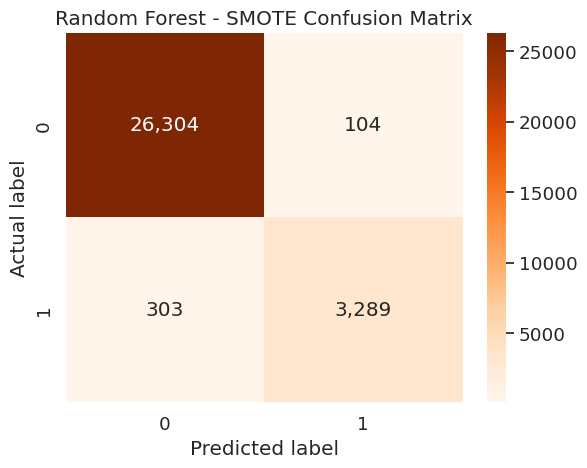

In [ ]:
# Set up the Random Forest Classifier model with SMOTE data

RFC = RandomForestClassifier()
RFC.fit(X_train_O, y_train_O)
y_pred_RFC_O = RFC.predict(X_test)

# Calculate the performance metrics

y_prob_RFC_O = RFC.predict_proba(X_test)

RFC_acc_O = sklearn.metrics.accuracy_score(y_test, y_pred_RFC_O) * 100
RFC_logloss_O = sklearn.metrics.log_loss(y_test, y_prob_RFC_O)
RFC_MSE_O = sklearn.metrics.mean_squared_error(y_test, y_pred_RFC_O)
RFC_RMSE_O = np.sqrt(RFC_MSE_O)
RFC_precision_O = precision_score(y_test, y_pred_RFC_O) * 100
RFC_recall_O = recall_score(y_test, y_pred_RFC_O) * 100
RFC_f1_O = f1_score(y_test, y_pred_RFC_O) * 100

# Set up the Random Forest Dataframe

df_RFC_O = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_RFC_O})
df_RFC_O['Predicted'] = df_RFC_O['Predicted'].astype(int)
RFC_results_O=["True Negative","False Positive","False Negative","True Positive"]

df_RFC_O=df_RFC_O.groupby(["Actual", "Predicted"]).size().reset_index(name="Count")
df_RFC_O['Result'] = RFC_results_O
df_RFC_O = df_RFC_O[["Result","Actual","Predicted","Count"]]

# Set up the confusion matrix

cf_matrix_RFC_O = confusion_matrix(y_test, y_pred_RFC_O.round())
cmap_RFC_O = sns.color_palette(palette='Oranges', as_cmap=True)

# Display the final results

print("-------------------------------------------------------------")
print("\033[4mMetrics\033[0m")
print("The Random Forest Classifier Model (Oversampled) has an accuracy of {}%".
      format(RFC_acc_O))
print("")
print("Log loss = {}".format(RFC_logloss_O))
print("Mean square error = {}".format(RFC_MSE_O))
print("Root mean square error = {}".format(RFC_RMSE_O))
print("Precision = {}%".format(RFC_precision_O))
print("Recall = {}%".format(RFC_recall_O))
print("F1 score = {}%".format(RFC_f1_O))
print("-------------------------------------------------------------")
print("\033[4mActual v Predicted\033[0m")
print(df_RFC_O)
print("-------------------------------------------------------------")
print("\033[4mHeatmap\033[0m")
print("")
sns.heatmap(cf_matrix_RFC_O, annot=True,
            fmt='0,', cmap=cmap_RFC_O)
plt.title('Random Forest - SMOTE Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('Actual label');

#### Model comparisons

In [ ]:
# Create comparison table

acc_data = {'model_Logistic_Regression' : [LR_acc, LR_precision, LR_recall, LR_f1],
        'model_2_Random_Forest' : [RFC_acc, RFC_precision, RFC_recall, RFC_f1],
        'model_2__Random_Forest_SMOTE' : [RFC_acc_O, RFC_precision_O, RFC_recall_O, RFC_f1_O]}

df_acc = pd.DataFrame(acc_data)
df_acc = df_acc.rename(index={0 : 'Accuracy',
                                1 : 'Precision',
                                2 : 'Recall',
                                3 : 'F1'})

df_acc = df_acc.T
df_acc= df_acc.apply(pd.to_numeric)
df_acc=df_acc.round(2)
df_acc

,Accuracy,Precision,Recall,F1
model_Logistic_Regression,87.84,0.00,0.00,0.00
model_2_Random_Forest,98.40,97.67,88.75,93.00
model_2__Random_Forest_SMOTE,98.64,96.93,91.56,94.17


The results table above shows model_2 (both variants) are performing with more accuracy than the original logistic regression model. Whereas the logistic regression model was only making false predictions (and therefore getting some correct but failing to make any false positive or negative predictions), both versions of model_2 are picking up on patterns in the data and trying to classify on that. As a result, model_2 has precision, recall and F1 scores are there are false predictions being made.

In [ ]:
print("model Confusion Matrix")
print(f'Confusion Matrix:\n{cm}')
print("")
print("model_2 Confusion Matrix")
print("")
print(df_RFC[['Result','Count']])
print("")
print("model_2_SMOTE Confusion Matrix")
print("")
print(df_RFC_O[['Result','Count']])

model Confusion Matrix
Confusion Matrix:
[[17567     0]
 [ 2433     0]]

model_2 Confusion Matrix

           Result  Count
0   True Negative  26332
1  False Positive     76
2  False Negative    404
3   True Positive   3188

model_2_SMOTE Confusion Matrix

           Result  Count
0   True Negative  26304
1  False Positive    104
2  False Negative    303
3   True Positive   3289


The confusion matrix above is interesting as firstly the performance of both model_2 variants are much stronger than the original logistic regression model as they're both predicting more TRUE values correctly. The main thing to note here is that model_2 is trying to pick up on variables within the data to make predictions and even though some are incorrect, this is better than solely predictiong everything as false which is what the original model was doing.

When comparing the two model_2 variants, the SMOTE model designed to handle the class imbalance has managed to predict more true positive instances and a smaller amount of false predictions (407 vs. 480), which is positive as it shows oversampling in this instance has helped the model train more effectively. However, the SMOTE variant also has a higher amount of false positive vs. the imbalanced model_2, which could be a problem as it's predicting customers will default when they aren't and if there's a big cost associated with this, then this could cause problems for the business if this model was put into production.

#### Any additional techniques you would like to add to improve your model, at your discretion

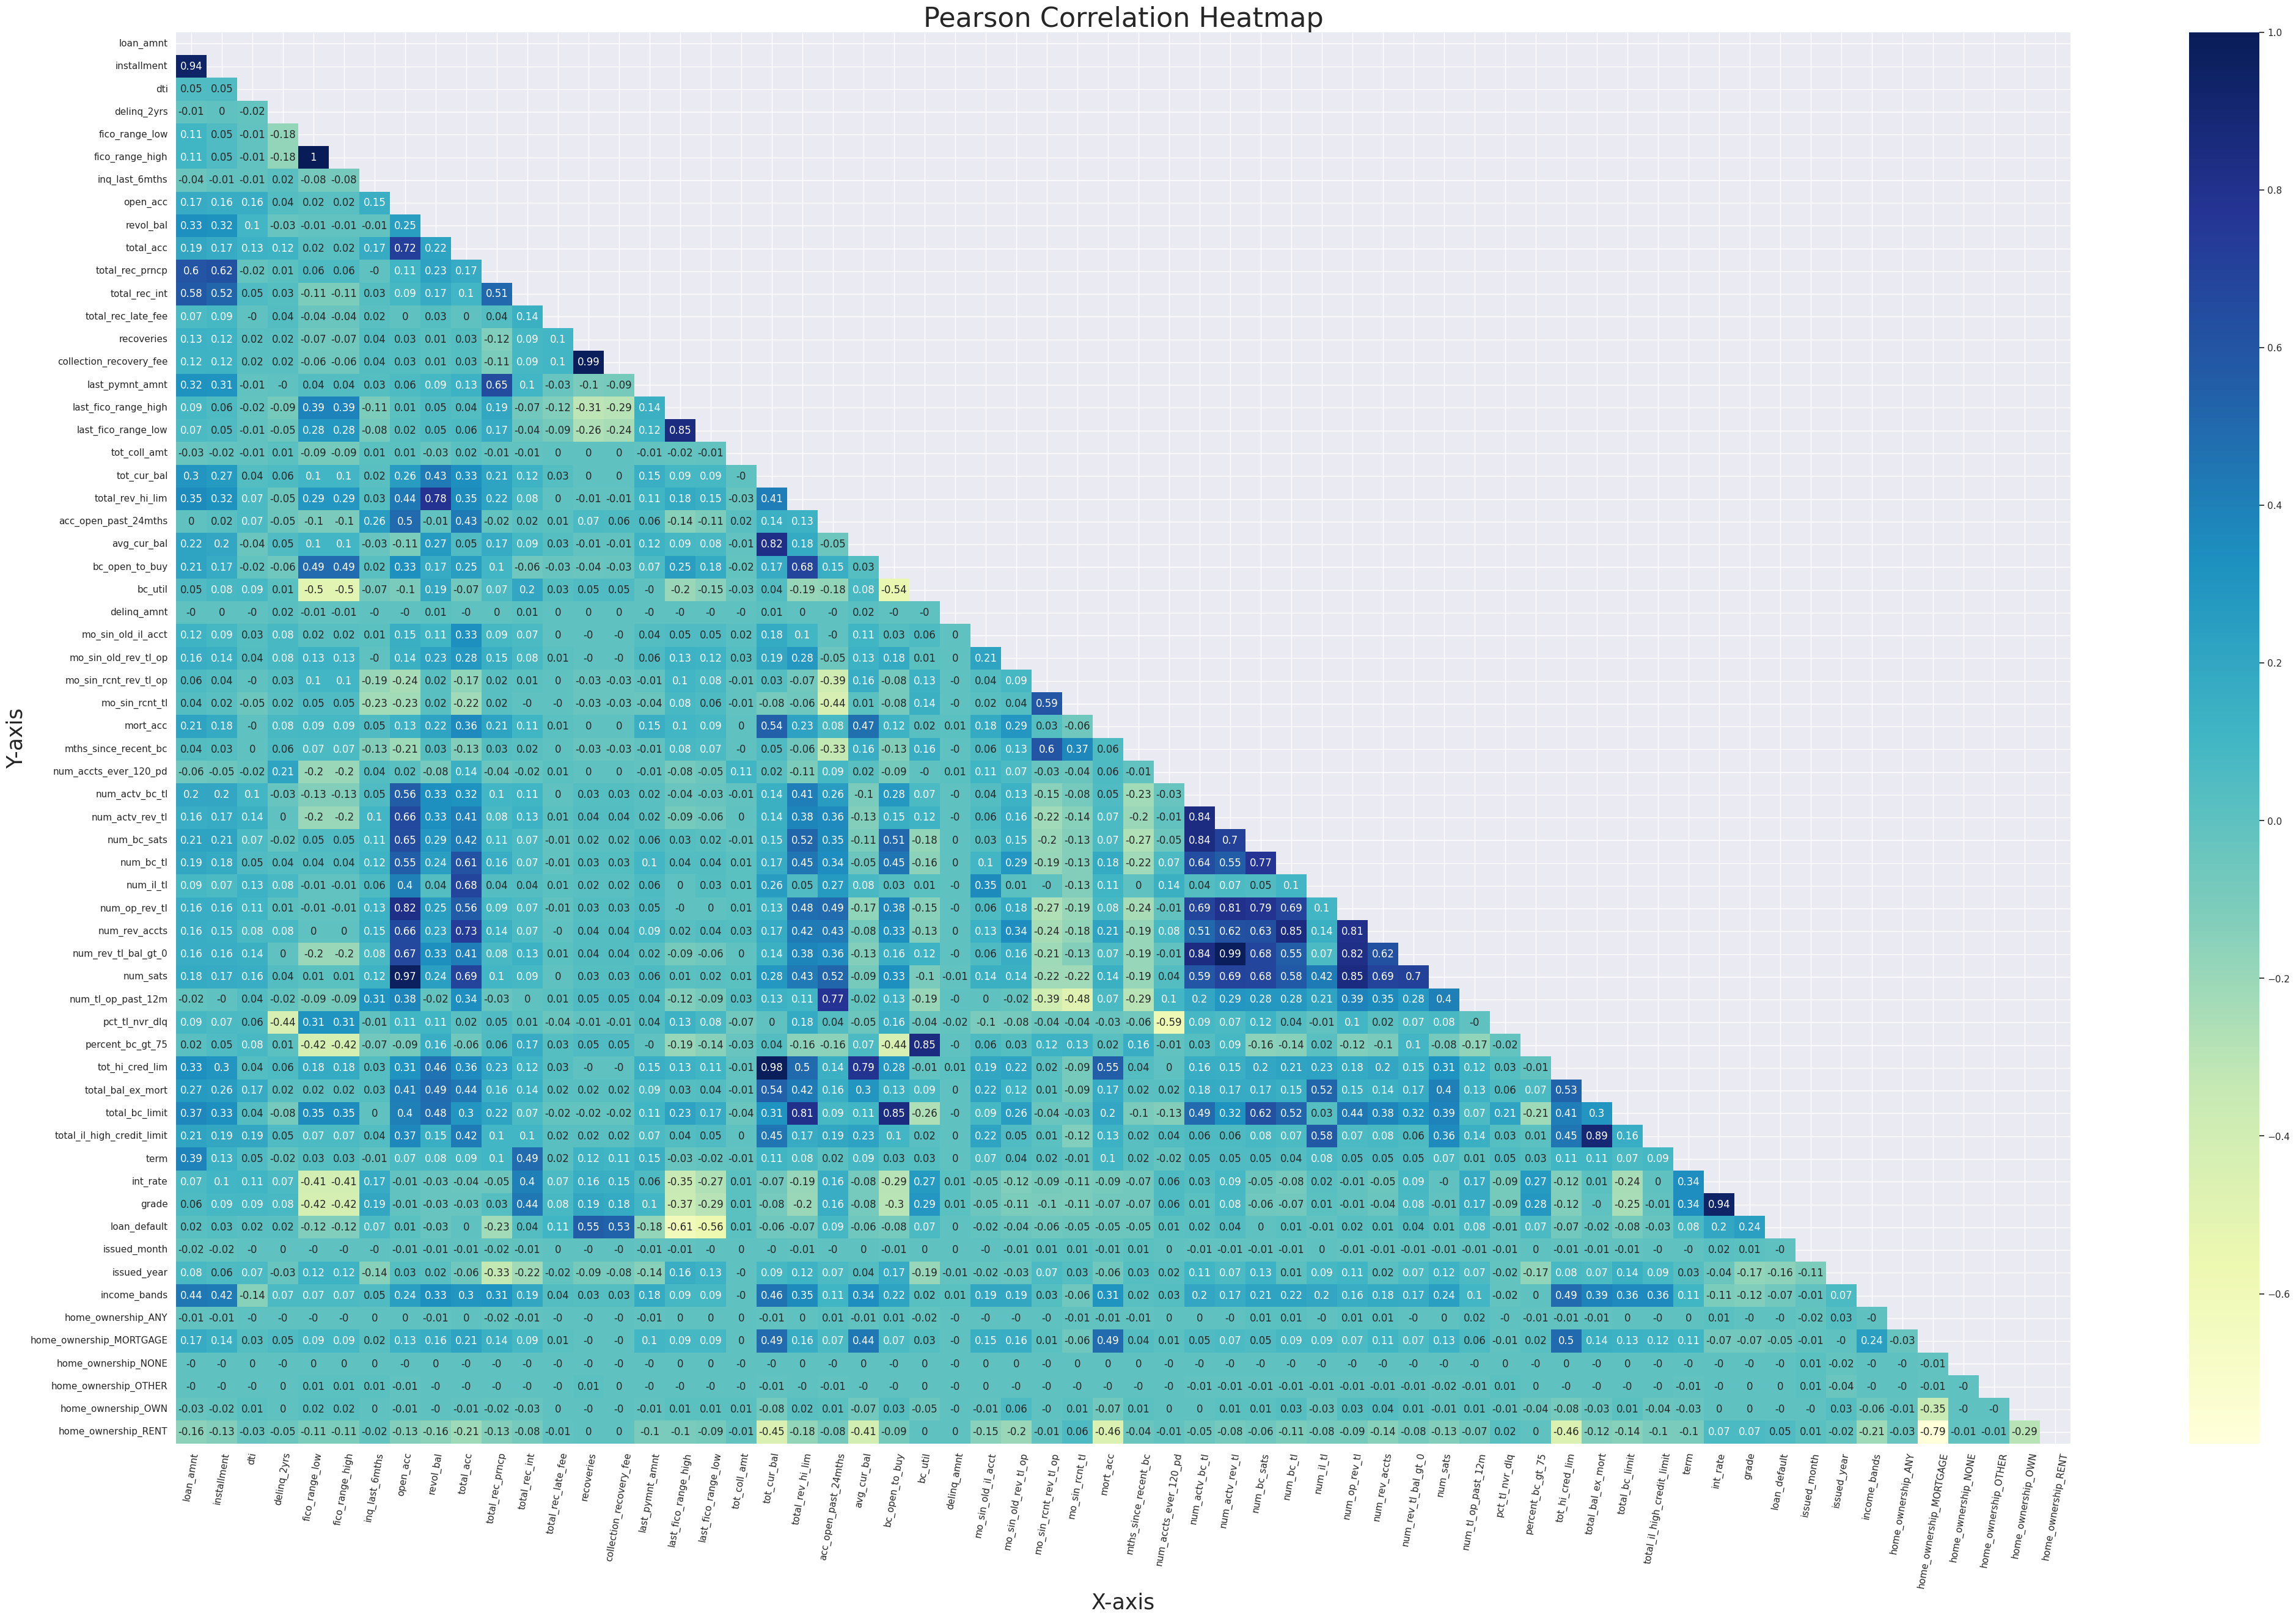

In [ ]:
# There are still quite a lot of features in model_2 and the positive
# performance could be a sign of overfitting, so I would advise taking
# another pass at the feature selection by using something like the
# Pearson correlation matrix below to see which features are too similar to
# each other and could potentially be dropped, and also try to identify if
# there's any data leakage happening. You could then tweak your features in X,
# retrain the model and validate again to see whether performance improves.

def corr_heatmap(df):
    if isinstance(df, pd.DataFrame):
        fig, ax = plt.subplots(figsize=(50,30))
        mask = np.zeros_like(df.corr(), dtype=bool)
        mask[np.triu_indices_from(mask)] = True
        ax = sns.heatmap(df.corr().round(2), mask=mask, ax=ax, cmap='YlGnBu',
                         annot=True, fmt='.2g')
        plt.xlabel('X-axis', fontsize=25)
        plt.ylabel('Y-axis', fontsize=25)
        plt.title('Pearson Correlation Heatmap', fontsize=32)
        plt.xticks(rotation = 80)
    else:
        print('pd.DataFrame object needed!')

sns.set(font_scale=1)

corr_heatmap(df2)